<a href="https://colab.research.google.com/github/victorpena01/Analisis-Exploratorio/blob/main/Proyecto_tasa_de_cambio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO CURSO ANALISIS EXPLORATORIO DE DATOS
# Estudiante: Victor Alfonso Peña

Por favor realice el análisis exploratorio de un dataset.

1. Ideal que sea una parte o versión de un dataset real  o con la complejidad para aplicar difereentes temas vistos en clase, incluya el contexto, pregunta smart, diccionario de datos e hipótesis u objetivo del análisis (1.0 p.t)

2. Realice el análisis exploratorio incluyendo análisis gráfico y estadístico, además de unas conclusiones (2.0)

3. Realice la preparación de los datos y pruebe con un algoritmo básico (2.0)


ENLACE PRESENTACIÓN: https://docs.google.com/presentation/d/1Voo3KOfBgvyLDqk4O4tOVQycYivKkgrz9aLaNJygcnQ/edit?usp=sharing



# Importe de librerias

In [747]:
import pandas as pd
from datetime import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder, FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn import preprocessing
import joblib
import scipy as sp





# Importe de Data Frame
### Corresponde al anexo del DANE:
### "Colombia, exportaciones de café, carbón, petróleo y sus derivados, ferroníquel y no tradicionales. 1992 - 2023p (julio)"




In [748]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTKmRRHX2RDWuNm86Db3t7apkI-6HsZgsXlb0FWX8ogMDL0YiQPZaqvCa3ZwgxCcw/pub?output=xlsx'

df = pd.read_excel(url)

# Aálisis Exploratorio Inicial

In [749]:
df.head(5)

,MES,Valores_Cafe,Peso_Cafe,Valores_Carbon,Peso_Carbon,Valores_Petroleo,Peso_Petroleo,Valores_Ferroniquel,Peso_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones
0,1992-01-01 00:00:00,108864.259,67119.24,39350.417,1085408.167,130960.007,1327509.075,2580.274,1119.144,281754.957,250016.024,531770.981
1,1992-02-01 00:00:00,114798.508,73666.14,56115.593,1491173.532,102964.170,1013884.795,17022.567,6667.400,290900.838,282102.924,573003.762
2,1992-03-01 00:00:00,89464.459,61684.86,11971.475,324415.008,139097.847,1349664.882,6689.358,2554.621,247223.139,305083.814,552306.953
3,1992-04-01 00:00:00,113534.579,81760.56,54218.066,1410411.213,123237.049,1110176.270,2159.911,772.877,293149.605,238675.349,531824.954
4,1992-05-01 00:00:00,118169.773,86318.46,36988.960,963401.778,126696.237,1128887.811,20405.646,7697.587,302260.616,326456.530,628717.146


In [750]:
df.tail(5)

,MES,Valores_Cafe,Peso_Cafe,Valores_Carbon,Peso_Carbon,Valores_Petroleo,Peso_Petroleo,Valores_Ferroniquel,Peso_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones
438,2023-05-01 00:00:00,2.419521e+05,45756.10640,9.149395e+05,5.665969e+06,1.191866e+06,2.768476e+06,80116.36510,17002.984,2.428874e+06,2.068988e+06,4.497862e+06
439,2023-06-01 00:00:00,2.118742e+05,39997.09605,7.774182e+05,5.178976e+06,1.187906e+06,2.686723e+06,49863.56226,11110.860,2.227062e+06,1.793943e+06,4.021005e+06
440,2023-07-01 00:00:00,2.162488e+05,43384.80472,6.791020e+05,5.001503e+06,1.357719e+06,2.787937e+06,52275.81263,14135.475,2.305346e+06,1.789440e+06,4.094786e+06
441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,Totales 23,1.644270e+06,316743.26000,5.770572e+06,3.305208e+07,8.486406e+06,1.878151e+07,435168.08900,86573.499,1.633642e+07,1.234678e+07,2.868320e+07


In [751]:
df.dtypes

MES                                   object
Valores_Cafe                         float64
Peso_Cafe                            float64
Valores_Carbon                       float64
Peso_Carbon                          float64
Valores_Petroleo                     float64
Peso_Petroleo                        float64
Valores_Ferroniquel                  float64
Peso_Ferroniquel                     float64
Total_Exportaciones_Tradicionales    float64
Total_Otros                          float64
Total_Exportaciones                  float64
dtype: object

Se evidencia que MES es tipo object cuando deberia ser data.time. Para el resto de variables es esperable que sean variables tipo float64

In [752]:
df.describe()

,Valores_Cafe,Peso_Cafe,Valores_Carbon,Peso_Carbon,Valores_Petroleo,Peso_Petroleo,Valores_Ferroniquel,Peso_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones
count,4.110000e+02,411.000000,4.110000e+02,4.110000e+02,4.110000e+02,4.110000e+02,4.110000e+02,411.000000,4.110000e+02,4.110000e+02,4.110000e+02
mean,2.902758e+05,94437.390743,6.056638e+05,8.513661e+06,1.642435e+06,4.375282e+06,8.026597e+04,16578.800157,2.618641e+06,1.790502e+06,4.409143e+06
std,5.019816e+05,153549.144446,1.295882e+06,1.529164e+07,3.701864e+06,7.664314e+06,1.651456e+05,28412.102301,5.465255e+06,3.198075e+06,8.524445e+06
min,3.966845e+04,20061.445590,1.188579e+04,3.219493e+05,5.215507e+04,4.742938e+05,0.000000e+00,0.000000,2.096814e+05,2.173130e+05,5.001466e+05
25%,1.125244e+05,43171.641470,8.204173e+04,2.569286e+06,2.730055e+05,1.570785e+06,1.708445e+04,5628.225500,4.877771e+05,5.162551e+05,1.012724e+06
50%,1.536390e+05,51284.280000,3.203770e+05,4.953838e+06,7.296496e+05,2.353677e+06,4.080445e+04,9857.584000,1.351851e+06,1.134860e+06,2.588994e+06
75%,2.120716e+05,62166.561440,5.671412e+05,6.801896e+06,1.432852e+06,3.483659e+06,6.748437e+04,12784.212500,2.395497e+06,1.396155e+06,3.793461e+06
max,3.962320e+06,966836.160000,1.228883e+07,1.052356e+08,3.248585e+07,4.914251e+07,1.713558e+06,169571.826860,4.215529e+07,2.102652e+07,6.012517e+07


In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MES                                411 non-null    object 
 1   Valores_Cafe                       411 non-null    float64
 2   Peso_Cafe                          411 non-null    float64
 3   Valores_Carbon                     411 non-null    float64
 4   Peso_Carbon                        411 non-null    float64
 5   Valores_Petroleo                   411 non-null    float64
 6   Peso_Petroleo                      411 non-null    float64
 7   Valores_Ferroniquel                411 non-null    float64
 8   Peso_Ferroniquel                   411 non-null    float64
 9   Total_Exportaciones_Tradicionales  411 non-null    float64
 10  Total_Otros                        411 non-null    float64
 11  Total_Exportaciones                411 non-null    float64

Se presentan 411 valores no nulos en cada una de las variables, sin embargo el df tiene un tamaño de 443. Llama la atención ¿Qué paso con esos 32 registros aparentemente nulos?

In [754]:
df.shape

(443, 12)

In [755]:
df['MES'].value_counts()

1992-01-01 00:00:00    1
2012-11-01 00:00:00    1
2013-08-01 00:00:00    1
2013-07-01 00:00:00    1
2013-06-01 00:00:00    1
                      ..
2002-05-01 00:00:00    1
2002-04-01 00:00:00    1
2002-03-01 00:00:00    1
2002-02-01 00:00:00    1
Totales 23             1
Name: MES, Length: 411, dtype: int64

In [756]:
check_nulls = df.isnull()
value_counts_per_column_null = check_nulls.apply(pd.Series.value_counts)
value_counts_per_column_null

,MES,Valores_Cafe,Peso_Cafe,Valores_Carbon,Peso_Carbon,Valores_Petroleo,Peso_Petroleo,Valores_Ferroniquel,Peso_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones
False,411,411,411,411,411,411,411,411,411,411,411,411
True,32,32,32,32,32,32,32,32,32,32,32,32


In [757]:
df.isna().sum()

MES                                  32
Valores_Cafe                         32
Peso_Cafe                            32
Valores_Carbon                       32
Peso_Carbon                          32
Valores_Petroleo                     32
Peso_Petroleo                        32
Valores_Ferroniquel                  32
Peso_Ferroniquel                     32
Total_Exportaciones_Tradicionales    32
Total_Otros                          32
Total_Exportaciones                  32
dtype: int64

In [758]:
df.dropna(subset=['MES'], inplace=True)
df

,MES,Valores_Cafe,Peso_Cafe,Valores_Carbon,Peso_Carbon,Valores_Petroleo,Peso_Petroleo,Valores_Ferroniquel,Peso_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones
0,1992-01-01 00:00:00,1.088643e+05,67119.24000,3.935042e+04,1.085408e+06,1.309600e+05,1.327509e+06,2580.27400,1119.144,2.817550e+05,2.500160e+05,5.317710e+05
1,1992-02-01 00:00:00,1.147985e+05,73666.14000,5.611559e+04,1.491174e+06,1.029642e+05,1.013885e+06,17022.56700,6667.400,2.909008e+05,2.821029e+05,5.730038e+05
2,1992-03-01 00:00:00,8.946446e+04,61684.86000,1.197148e+04,3.244150e+05,1.390978e+05,1.349665e+06,6689.35800,2554.621,2.472231e+05,3.050838e+05,5.523070e+05
3,1992-04-01 00:00:00,1.135346e+05,81760.56000,5.421807e+04,1.410411e+06,1.232370e+05,1.110176e+06,2159.91100,772.877,2.931496e+05,2.386753e+05,5.318250e+05
4,1992-05-01 00:00:00,1.181698e+05,86318.46000,3.698896e+04,9.634018e+05,1.266962e+05,1.128888e+06,20405.64600,7697.587,3.022606e+05,3.264565e+05,6.287171e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
437,2023-04-01 00:00:00,2.034715e+05,38720.74246,5.439852e+05,3.090908e+06,1.289118e+06,2.821280e+06,47707.22246,8205.063,2.084282e+06,1.654932e+06,3.739214e+06
438,2023-05-01 00:00:00,2.419521e+05,45756.10640,9.149395e+05,5.665969e+06,1.191866e+06,2.768476e+06,80116.36510,17002.984,2.428874e+06,2.068988e+06,4.497862e+06
439,2023-06-01 00:00:00,2.118742e+05,39997.09605,7.774182e+05,5.178976e+06,1.187906e+06,2.686723e+06,49863.56226,11110.860,2.227062e+06,1.793943e+06,4.021005e+06
440,2023-07-01 00:00:00,2.162488e+05,43384.80472,6.791020e+05,5.001503e+06,1.357719e+06,2.787937e+06,52275.81263,14135.475,2.305346e+06,1.789440e+06,4.094786e+06


In [759]:
prefix = 'Totales'
condition = df['MES'].str.startswith(prefix, na=False)
condition.value_counts()

False    379
True      32
Name: MES, dtype: int64

In [760]:
df = df.drop(df[condition].index)
df

,MES,Valores_Cafe,Peso_Cafe,Valores_Carbon,Peso_Carbon,Valores_Petroleo,Peso_Petroleo,Valores_Ferroniquel,Peso_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones
0,1992-01-01 00:00:00,108864.25900,67119.24000,39350.41700,1.085408e+06,1.309600e+05,1.327509e+06,2580.27400,1119.144,281754.957,250016.024,5.317710e+05
1,1992-02-01 00:00:00,114798.50800,73666.14000,56115.59300,1.491174e+06,1.029642e+05,1.013885e+06,17022.56700,6667.400,290900.838,282102.924,5.730038e+05
2,1992-03-01 00:00:00,89464.45900,61684.86000,11971.47500,3.244150e+05,1.390978e+05,1.349665e+06,6689.35800,2554.621,247223.139,305083.814,5.523070e+05
3,1992-04-01 00:00:00,113534.57900,81760.56000,54218.06600,1.410411e+06,1.232370e+05,1.110176e+06,2159.91100,772.877,293149.605,238675.349,5.318250e+05
4,1992-05-01 00:00:00,118169.77300,86318.46000,36988.96000,9.634018e+05,1.266962e+05,1.128888e+06,20405.64600,7697.587,302260.616,326456.530,6.287171e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
436,2023-03-01 00:00:00,279267.56867,53931.99300,958393.85151,5.025521e+06,1.169865e+06,2.630001e+06,62562.48071,11543.115,2470089.314,1961822.045,4.431911e+06
437,2023-04-01 00:00:00,203471.48694,38720.74246,543985.21732,3.090908e+06,1.289118e+06,2.821280e+06,47707.22246,8205.063,2084281.844,1654931.988,3.739214e+06
438,2023-05-01 00:00:00,241952.05255,45756.10640,914939.47983,5.665969e+06,1.191866e+06,2.768476e+06,80116.36510,17002.984,2428874.232,2068988.183,4.497862e+06
439,2023-06-01 00:00:00,211874.16780,39997.09605,777418.20690,5.178976e+06,1.187906e+06,2.686723e+06,49863.56226,11110.860,2227062.045,1793942.610,4.021005e+06


In [761]:
df_cleaned = df.drop(columns=['Peso_Cafe','Peso_Carbon','Peso_Petroleo','Peso_Ferroniquel'])
df_cleaned

,MES,Valores_Cafe,Valores_Carbon,Valores_Petroleo,Valores_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones
0,1992-01-01 00:00:00,108864.25900,39350.41700,1.309600e+05,2580.27400,281754.957,250016.024,5.317710e+05
1,1992-02-01 00:00:00,114798.50800,56115.59300,1.029642e+05,17022.56700,290900.838,282102.924,5.730038e+05
2,1992-03-01 00:00:00,89464.45900,11971.47500,1.390978e+05,6689.35800,247223.139,305083.814,5.523070e+05
3,1992-04-01 00:00:00,113534.57900,54218.06600,1.232370e+05,2159.91100,293149.605,238675.349,5.318250e+05
4,1992-05-01 00:00:00,118169.77300,36988.96000,1.266962e+05,20405.64600,302260.616,326456.530,6.287171e+05
...,...,...,...,...,...,...,...,...
436,2023-03-01 00:00:00,279267.56867,958393.85151,1.169865e+06,62562.48071,2470089.314,1961822.045,4.431911e+06
437,2023-04-01 00:00:00,203471.48694,543985.21732,1.289118e+06,47707.22246,2084281.844,1654931.988,3.739214e+06
438,2023-05-01 00:00:00,241952.05255,914939.47983,1.191866e+06,80116.36510,2428874.232,2068988.183,4.497862e+06
439,2023-06-01 00:00:00,211874.16780,777418.20690,1.187906e+06,49863.56226,2227062.045,1793942.610,4.021005e+06


In [762]:
df_cleaned['check_values'] = df['Valores_Cafe']+df['Valores_Carbon']+df['Valores_Petroleo']+df['Valores_Ferroniquel']
df_cleaned['difference'] = df_cleaned['check_values'] - df['Total_Exportaciones_Tradicionales']
df_cleaned

,MES,Valores_Cafe,Valores_Carbon,Valores_Petroleo,Valores_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones,check_values,difference
0,1992-01-01 00:00:00,108864.25900,39350.41700,1.309600e+05,2580.27400,281754.957,250016.024,5.317710e+05,2.817550e+05,0.000000e+00
1,1992-02-01 00:00:00,114798.50800,56115.59300,1.029642e+05,17022.56700,290900.838,282102.924,5.730038e+05,2.909008e+05,0.000000e+00
2,1992-03-01 00:00:00,89464.45900,11971.47500,1.390978e+05,6689.35800,247223.139,305083.814,5.523070e+05,2.472231e+05,0.000000e+00
3,1992-04-01 00:00:00,113534.57900,54218.06600,1.232370e+05,2159.91100,293149.605,238675.349,5.318250e+05,2.931496e+05,5.820766e-11
4,1992-05-01 00:00:00,118169.77300,36988.96000,1.266962e+05,20405.64600,302260.616,326456.530,6.287171e+05,3.022606e+05,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
436,2023-03-01 00:00:00,279267.56867,958393.85151,1.169865e+06,62562.48071,2470089.314,1961822.045,4.431911e+06,2.470089e+06,-3.000000e-04
437,2023-04-01 00:00:00,203471.48694,543985.21732,1.289118e+06,47707.22246,2084281.844,1654931.988,3.739214e+06,2.084282e+06,4.600000e-04
438,2023-05-01 00:00:00,241952.05255,914939.47983,1.191866e+06,80116.36510,2428874.232,2068988.183,4.497862e+06,2.428874e+06,-3.599999e-04
439,2023-06-01 00:00:00,211874.16780,777418.20690,1.187906e+06,49863.56226,2227062.045,1793942.610,4.021005e+06,2.227062e+06,-1.600003e-04


In [763]:
print(max(df_cleaned['difference']))
print(min(df_cleaned['difference']))

0.0004900000058114529
-0.0004900000058114529


In [764]:
df_cleaned['total_difference'] = df_cleaned['Total_Exportaciones'] - df_cleaned['Total_Exportaciones_Tradicionales'] - df_cleaned['Total_Otros']
df_cleaned

,MES,Valores_Cafe,Valores_Carbon,Valores_Petroleo,Valores_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones,check_values,difference,total_difference
0,1992-01-01 00:00:00,108864.25900,39350.41700,1.309600e+05,2580.27400,281754.957,250016.024,5.317710e+05,2.817550e+05,0.000000e+00,0.00000
1,1992-02-01 00:00:00,114798.50800,56115.59300,1.029642e+05,17022.56700,290900.838,282102.924,5.730038e+05,2.909008e+05,0.000000e+00,0.00000
2,1992-03-01 00:00:00,89464.45900,11971.47500,1.390978e+05,6689.35800,247223.139,305083.814,5.523070e+05,2.472231e+05,0.000000e+00,0.00000
3,1992-04-01 00:00:00,113534.57900,54218.06600,1.232370e+05,2159.91100,293149.605,238675.349,5.318250e+05,2.931496e+05,5.820766e-11,0.00000
4,1992-05-01 00:00:00,118169.77300,36988.96000,1.266962e+05,20405.64600,302260.616,326456.530,6.287171e+05,3.022606e+05,0.000000e+00,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
436,2023-03-01 00:00:00,279267.56867,958393.85151,1.169865e+06,62562.48071,2470089.314,1961822.045,4.431911e+06,2.470089e+06,-3.000000e-04,-0.00066
437,2023-04-01 00:00:00,203471.48694,543985.21732,1.289118e+06,47707.22246,2084281.844,1654931.988,3.739214e+06,2.084282e+06,4.600000e-04,0.00049
438,2023-05-01 00:00:00,241952.05255,914939.47983,1.191866e+06,80116.36510,2428874.232,2068988.183,4.497862e+06,2.428874e+06,-3.599999e-04,-0.00069
439,2023-06-01 00:00:00,211874.16780,777418.20690,1.187906e+06,49863.56226,2227062.045,1793942.610,4.021005e+06,2.227062e+06,-1.600003e-04,0.00007


In [765]:
print(max(df_cleaned['total_difference']))
print(min(df_cleaned['total_difference']))

0.0008799973875284195
-0.0008900014217942953


In [766]:
df2 = df.drop(columns=['Peso_Cafe','Peso_Carbon','Peso_Petroleo','Peso_Ferroniquel'])
df2

,MES,Valores_Cafe,Valores_Carbon,Valores_Petroleo,Valores_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones
0,1992-01-01 00:00:00,108864.25900,39350.41700,1.309600e+05,2580.27400,281754.957,250016.024,5.317710e+05
1,1992-02-01 00:00:00,114798.50800,56115.59300,1.029642e+05,17022.56700,290900.838,282102.924,5.730038e+05
2,1992-03-01 00:00:00,89464.45900,11971.47500,1.390978e+05,6689.35800,247223.139,305083.814,5.523070e+05
3,1992-04-01 00:00:00,113534.57900,54218.06600,1.232370e+05,2159.91100,293149.605,238675.349,5.318250e+05
4,1992-05-01 00:00:00,118169.77300,36988.96000,1.266962e+05,20405.64600,302260.616,326456.530,6.287171e+05
...,...,...,...,...,...,...,...,...
436,2023-03-01 00:00:00,279267.56867,958393.85151,1.169865e+06,62562.48071,2470089.314,1961822.045,4.431911e+06
437,2023-04-01 00:00:00,203471.48694,543985.21732,1.289118e+06,47707.22246,2084281.844,1654931.988,3.739214e+06
438,2023-05-01 00:00:00,241952.05255,914939.47983,1.191866e+06,80116.36510,2428874.232,2068988.183,4.497862e+06
439,2023-06-01 00:00:00,211874.16780,777418.20690,1.187906e+06,49863.56226,2227062.045,1793942.610,4.021005e+06


In [767]:
df2['MES'] = pd.to_datetime(df2['MES'])
df2

,MES,Valores_Cafe,Valores_Carbon,Valores_Petroleo,Valores_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones
0,1992-01-01,108864.25900,39350.41700,1.309600e+05,2580.27400,281754.957,250016.024,5.317710e+05
1,1992-02-01,114798.50800,56115.59300,1.029642e+05,17022.56700,290900.838,282102.924,5.730038e+05
2,1992-03-01,89464.45900,11971.47500,1.390978e+05,6689.35800,247223.139,305083.814,5.523070e+05
3,1992-04-01,113534.57900,54218.06600,1.232370e+05,2159.91100,293149.605,238675.349,5.318250e+05
4,1992-05-01,118169.77300,36988.96000,1.266962e+05,20405.64600,302260.616,326456.530,6.287171e+05
...,...,...,...,...,...,...,...,...
436,2023-03-01,279267.56867,958393.85151,1.169865e+06,62562.48071,2470089.314,1961822.045,4.431911e+06
437,2023-04-01,203471.48694,543985.21732,1.289118e+06,47707.22246,2084281.844,1654931.988,3.739214e+06
438,2023-05-01,241952.05255,914939.47983,1.191866e+06,80116.36510,2428874.232,2068988.183,4.497862e+06
439,2023-06-01,211874.16780,777418.20690,1.187906e+06,49863.56226,2227062.045,1793942.610,4.021005e+06



# DOLLAR TRM




In [768]:
url_dollar = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTY0aXHzJQ9jU7oGL1CX-9S_BFHX2Cm8qQAxE3il8lhK5IsrVfwsWpVG7qeNr5dig/pub?output=xlsx'

dfd = pd.read_excel(url_dollar)
dfd

,Fecha,TRM
0,1992-01-01,632.37
1,1992-01-02,638.61
2,1992-01-03,632.58
3,1992-01-04,638.07
4,1992-01-05,638.07
...,...,...
11530,2023-07-27,3951.10
11531,2023-07-28,3932.04
11532,2023-07-29,3923.49
11533,2023-07-30,3923.49


In [769]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11535 entries, 0 to 11534
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   11535 non-null  datetime64[ns]
 1   TRM     11535 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 180.4 KB


In [770]:
dfd['mes'] = dfd['Fecha'].dt.month
dfd['año'] = dfd['Fecha'].dt.year


# Agrupa los datos por año y mes y calcula los valores máximos, mínimos, promedios y medianos
resultados = dfd.groupby(['año', 'mes']).agg({'TRM': ['max', 'min', 'mean', 'median']})

# Restablece el índice del DataFrame resultante
resultados.reset_index(inplace=True)

# Cambia el nombre de las columnas
resultados.columns = ['Año', 'Mes', 'TRM_Máx', 'TRM_Mín', 'TRM_Prom', 'TRM_Medn']

# Muestra el DataFrame resultante
print(resultados)

      Año  Mes  TRM_Máx  TRM_Mín     TRM_Prom  TRM_Medn
0    1992    1   659.74   632.37   644.058065   645.040
1    1992    2   640.52   633.03   635.671724   634.930
2    1992    3   647.24   635.86   640.501935   640.950
3    1992    4   657.97   641.98   649.955000   650.275
4    1992    5   664.50   653.10   659.771290   660.880
..    ...  ...      ...      ...          ...       ...
374  2023    3  4866.50  4627.27  4766.305806  4755.590
375  2023    4  4669.00  4424.02  4542.674333  4544.185
376  2023    5  4713.08  4408.65  4540.089032  4528.670
377  2023    6  4434.09  4114.39  4209.268000  4173.660
378  2023    7  4195.93  3923.49  4069.233548  4089.300

[379 rows x 6 columns]


In [771]:
resultados['dia'] = 1
resultados

,Año,Mes,TRM_Máx,TRM_Mín,TRM_Prom,TRM_Medn,dia
0,1992,1,659.74,632.37,644.058065,645.040,1
1,1992,2,640.52,633.03,635.671724,634.930,1
2,1992,3,647.24,635.86,640.501935,640.950,1
3,1992,4,657.97,641.98,649.955000,650.275,1
4,1992,5,664.50,653.10,659.771290,660.880,1
...,...,...,...,...,...,...,...
374,2023,3,4866.50,4627.27,4766.305806,4755.590,1
375,2023,4,4669.00,4424.02,4542.674333,4544.185,1
376,2023,5,4713.08,4408.65,4540.089032,4528.670,1
377,2023,6,4434.09,4114.39,4209.268000,4173.660,1


In [772]:
resultados['Fecha'] = pd.to_datetime(dict(year=resultados.Año, month=resultados.Mes, day=resultados.dia))
resultados

,Año,Mes,TRM_Máx,TRM_Mín,TRM_Prom,TRM_Medn,dia,Fecha
0,1992,1,659.74,632.37,644.058065,645.040,1,1992-01-01
1,1992,2,640.52,633.03,635.671724,634.930,1,1992-02-01
2,1992,3,647.24,635.86,640.501935,640.950,1,1992-03-01
3,1992,4,657.97,641.98,649.955000,650.275,1,1992-04-01
4,1992,5,664.50,653.10,659.771290,660.880,1,1992-05-01
...,...,...,...,...,...,...,...,...
374,2023,3,4866.50,4627.27,4766.305806,4755.590,1,2023-03-01
375,2023,4,4669.00,4424.02,4542.674333,4544.185,1,2023-04-01
376,2023,5,4713.08,4408.65,4540.089032,4528.670,1,2023-05-01
377,2023,6,4434.09,4114.39,4209.268000,4173.660,1,2023-06-01


In [773]:
resultados.dtypes

Año                  int64
Mes                  int64
TRM_Máx            float64
TRM_Mín            float64
TRM_Prom           float64
TRM_Medn           float64
dia                  int64
Fecha       datetime64[ns]
dtype: object

In [774]:
df2.rename(columns={'MES':'Fecha'}, inplace=True)
df2

,Fecha,Valores_Cafe,Valores_Carbon,Valores_Petroleo,Valores_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones
0,1992-01-01,108864.25900,39350.41700,1.309600e+05,2580.27400,281754.957,250016.024,5.317710e+05
1,1992-02-01,114798.50800,56115.59300,1.029642e+05,17022.56700,290900.838,282102.924,5.730038e+05
2,1992-03-01,89464.45900,11971.47500,1.390978e+05,6689.35800,247223.139,305083.814,5.523070e+05
3,1992-04-01,113534.57900,54218.06600,1.232370e+05,2159.91100,293149.605,238675.349,5.318250e+05
4,1992-05-01,118169.77300,36988.96000,1.266962e+05,20405.64600,302260.616,326456.530,6.287171e+05
...,...,...,...,...,...,...,...,...
436,2023-03-01,279267.56867,958393.85151,1.169865e+06,62562.48071,2470089.314,1961822.045,4.431911e+06
437,2023-04-01,203471.48694,543985.21732,1.289118e+06,47707.22246,2084281.844,1654931.988,3.739214e+06
438,2023-05-01,241952.05255,914939.47983,1.191866e+06,80116.36510,2428874.232,2068988.183,4.497862e+06
439,2023-06-01,211874.16780,777418.20690,1.187906e+06,49863.56226,2227062.045,1793942.610,4.021005e+06


In [775]:
data = pd.merge(df2,resultados,on='Fecha')
data = data.drop(columns=['Año','Mes','dia'])
data

,Fecha,Valores_Cafe,Valores_Carbon,Valores_Petroleo,Valores_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones,TRM_Máx,TRM_Mín,TRM_Prom,TRM_Medn
0,1992-01-01,108864.25900,39350.41700,1.309600e+05,2580.27400,281754.957,250016.024,5.317710e+05,659.74,632.37,644.058065,645.040
1,1992-02-01,114798.50800,56115.59300,1.029642e+05,17022.56700,290900.838,282102.924,5.730038e+05,640.52,633.03,635.671724,634.930
2,1992-03-01,89464.45900,11971.47500,1.390978e+05,6689.35800,247223.139,305083.814,5.523070e+05,647.24,635.86,640.501935,640.950
3,1992-04-01,113534.57900,54218.06600,1.232370e+05,2159.91100,293149.605,238675.349,5.318250e+05,657.97,641.98,649.955000,650.275
4,1992-05-01,118169.77300,36988.96000,1.266962e+05,20405.64600,302260.616,326456.530,6.287171e+05,664.50,653.10,659.771290,660.880
...,...,...,...,...,...,...,...,...,...,...,...,...
374,2023-03-01,279267.56867,958393.85151,1.169865e+06,62562.48071,2470089.314,1961822.045,4.431911e+06,4866.50,4627.27,4766.305806,4755.590
375,2023-04-01,203471.48694,543985.21732,1.289118e+06,47707.22246,2084281.844,1654931.988,3.739214e+06,4669.00,4424.02,4542.674333,4544.185
376,2023-05-01,241952.05255,914939.47983,1.191866e+06,80116.36510,2428874.232,2068988.183,4.497862e+06,4713.08,4408.65,4540.089032,4528.670
377,2023-06-01,211874.16780,777418.20690,1.187906e+06,49863.56226,2227062.045,1793942.610,4.021005e+06,4434.09,4114.39,4209.268000,4173.660


# DATA UNIDA

In [776]:
data.describe()

,Valores_Cafe,Valores_Carbon,Valores_Petroleo,Valores_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones,TRM_Máx,TRM_Mín,TRM_Prom,TRM_Medn
count,379.000000,3.790000e+02,3.790000e+02,379.000000,3.790000e+02,3.790000e+02,3.790000e+02,379.000000,379.000000,379.000000,379.000000
mean,157392.268780,3.284008e+05,8.905553e+05,43521.521033,1.419870e+06,9.708394e+05,2.390709e+06,2285.560264,2188.918865,2234.081938,2233.056834
std,69201.086409,2.849174e+05,7.805263e+05,38884.840346,1.065115e+06,4.570120e+05,1.467589e+06,983.104727,920.811967,949.371139,948.523655
min,39668.446510,1.188579e+04,5.215507e+04,0.000000,2.096814e+05,2.173130e+05,5.001466e+05,640.520000,632.370000,635.671724,634.930000
25%,107805.467050,7.703585e+04,2.571862e+05,15206.313500,4.714374e+05,5.017120e+05,9.876802e+05,1795.565000,1751.650000,1774.702565,1775.475000
50%,148232.098700,2.729992e+05,5.883610e+05,34917.071430,1.109590e+06,1.077813e+06,2.289482e+06,2212.260000,2152.310000,2187.267097,2183.010000
75%,194874.910055,5.045916e+05,1.278764e+06,60123.467895,2.143855e+06,1.333089e+06,3.391147e+06,2928.235000,2830.680000,2875.885672,2871.590000
max,424027.560530,1.809653e+06,3.041024e+06,368551.967260,4.163022e+06,2.068988e+06,5.913682e+06,5061.210000,4801.060000,4926.660667,4914.525000


In [777]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 0 to 378
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Fecha                              379 non-null    datetime64[ns]
 1   Valores_Cafe                       379 non-null    float64       
 2   Valores_Carbon                     379 non-null    float64       
 3   Valores_Petroleo                   379 non-null    float64       
 4   Valores_Ferroniquel                379 non-null    float64       
 5   Total_Exportaciones_Tradicionales  379 non-null    float64       
 6   Total_Otros                        379 non-null    float64       
 7   Total_Exportaciones                379 non-null    float64       
 8   TRM_Máx                            379 non-null    float64       
 9   TRM_Mín                            379 non-null    float64       
 10  TRM_Prom                           379

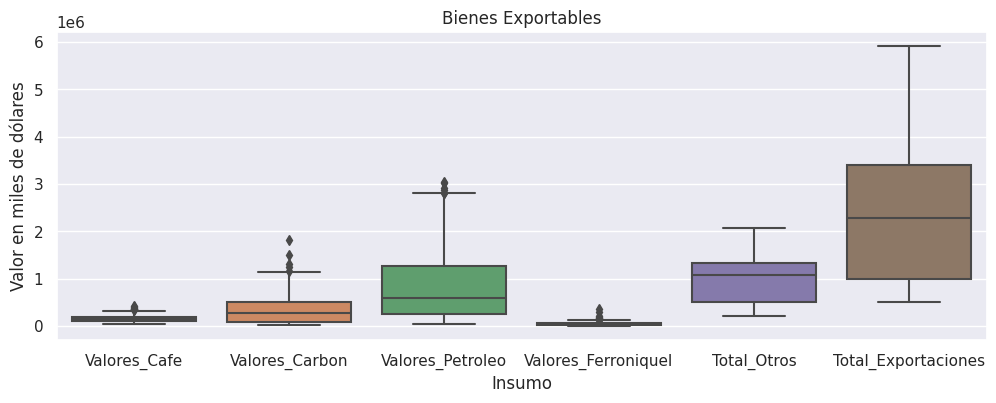

In [778]:
selected_data = data.loc[:, ['Valores_Cafe', 'Valores_Carbon','Valores_Petroleo','Valores_Ferroniquel','Total_Otros','Total_Exportaciones']]

sns.set(rc={'figure.figsize':(12,4)})
sns.boxplot(selected_data)
plt.title("Bienes Exportables")
plt.xlabel('Insumo')
plt.ylabel('Valor en miles de dólares')
plt.show()

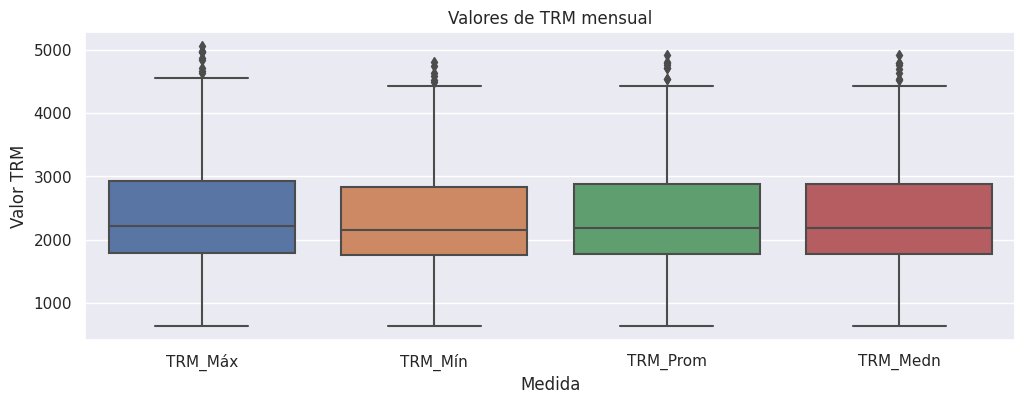

In [779]:
selected_data2 = data.loc[:, ['TRM_Máx', 'TRM_Mín','TRM_Prom','TRM_Medn']]

sns.set(rc={'figure.figsize':(12,4)})
sns.boxplot(selected_data2)
plt.title("Valores de TRM mensual")
plt.xlabel('Medida')
plt.ylabel('Valor TRM')
plt.show()


In [780]:
min_val1 = selected_data.min()
max_val1 = selected_data.max()
data_normalized1 = (selected_data - min_val1) / (max_val1 - min_val1)



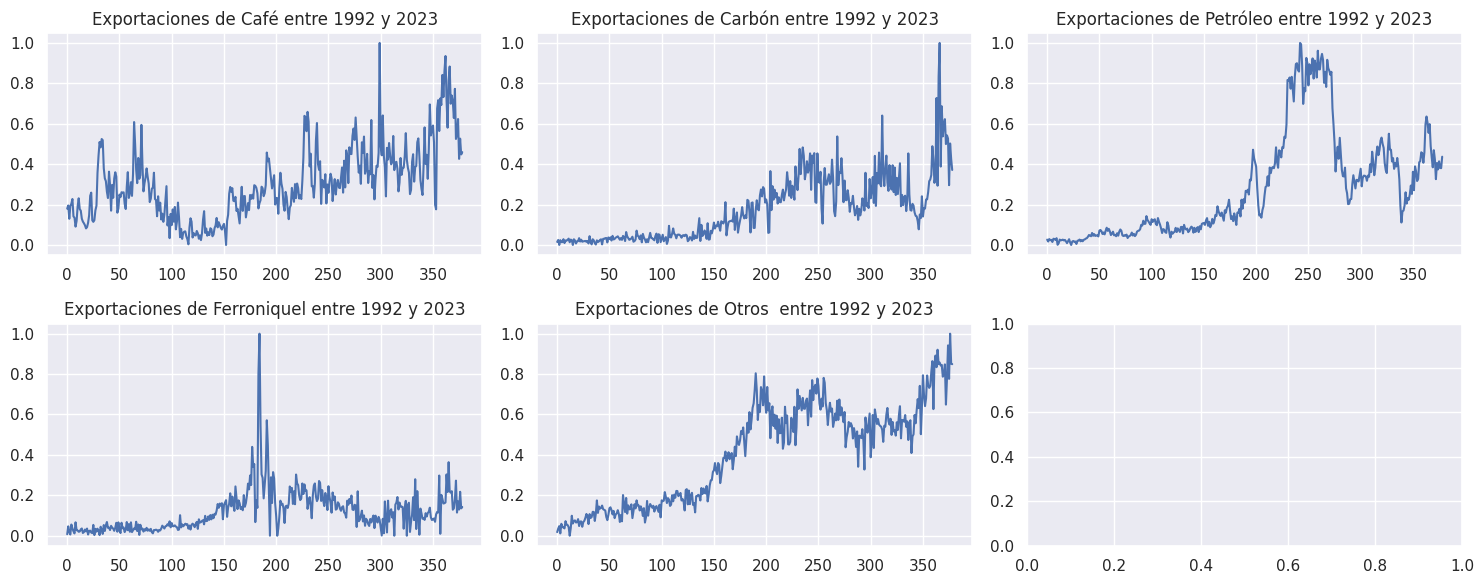

In [781]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

axes[0, 0].plot(data_normalized1['Valores_Cafe'])
axes[0, 0].set_title('Exportaciones de Café entre 1992 y 2023')


axes[0, 1].plot(data_normalized1['Valores_Carbon'])
axes[0, 1].set_title('Exportaciones de Carbón entre 1992 y 2023')


axes[0, 2].plot(data_normalized1['Valores_Petroleo'])
axes[0, 2].set_title('Exportaciones de Petróleo entre 1992 y 2023')


axes[1, 0].plot(data_normalized1['Valores_Ferroniquel'])
axes[1, 0].set_title('Exportaciones de Ferroniquel entre 1992 y 2023')

axes[1, 1].plot(data_normalized1['Total_Otros'])
axes[1, 1].set_title('Exportaciones de Otros  entre 1992 y 2023')

plt.tight_layout()
plt.show()


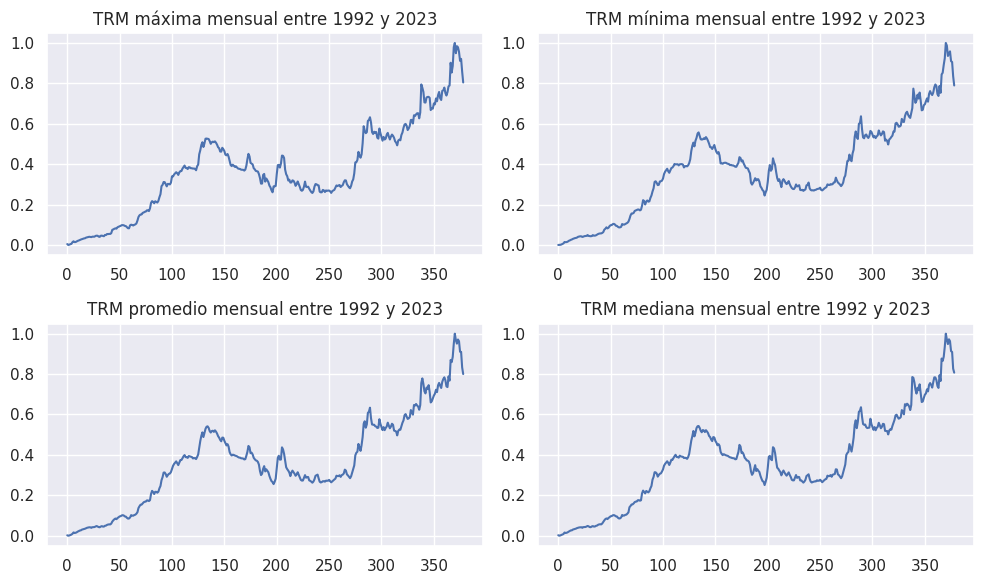

In [782]:
min_val2 = selected_data2.min()
max_val2 = selected_data2.max()
data_normalized2 = (selected_data2 - min_val2) / (max_val2 - min_val2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

axes[0, 0].plot(data_normalized2['TRM_Máx'])
axes[0, 0].set_title('TRM máxima mensual entre 1992 y 2023')


axes[0, 1].plot(data_normalized2['TRM_Mín'])
axes[0, 1].set_title('TRM mínima mensual entre 1992 y 2023')


axes[1, 0].plot(data_normalized2['TRM_Prom'])
axes[1, 0].set_title('TRM promedio mensual entre 1992 y 2023')


axes[1, 1].plot(data_normalized2['TRM_Medn'])
axes[1, 1].set_title('TRM mediana mensual entre 1992 y 2023')

plt.tight_layout()
plt.show()

# OUTLIERS

In [783]:
data_s = data.drop(columns=['Fecha']) #Data S ---> Data Simplified
q1 = data_s.quantile(0.25)
q3 = data_s.quantile(0.75)
IQR = q3 - q1
outliers = data_s[ ((data_s<(q1-1.5*IQR)) | (data_s>(q3+1.5*IQR))) ]

In [784]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 0 to 378
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Valores_Cafe                       7 non-null      float64
 1   Valores_Carbon                     5 non-null      float64
 2   Valores_Petroleo                   6 non-null      float64
 3   Valores_Ferroniquel                8 non-null      float64
 4   Total_Exportaciones_Tradicionales  0 non-null      float64
 5   Total_Otros                        0 non-null      float64
 6   Total_Exportaciones                0 non-null      float64
 7   TRM_Máx                            9 non-null      float64
 8   TRM_Mín                            6 non-null      float64
 9   TRM_Prom                           8 non-null      float64
 10  TRM_Medn                           8 non-null      float64
dtypes: float64(11)
memory usage: 35.5 KB


In [785]:
filtered_outliers1 = outliers[outliers['Valores_Cafe'].notna()]
filtered_outliers1

,Valores_Cafe,Valores_Carbon,Valores_Petroleo,Valores_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones,TRM_Máx,TRM_Mín,TRM_Prom,TRM_Medn
299,424027.56053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,363128.04047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,370330.64893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,399119.07773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,352504.16820,1.510818e+06,NaN,134113.96699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,379143.04024,1.809653e+06,NaN,NaN,NaN,NaN,NaN,4627.46,NaN,NaN,NaN
371,336698.50393,NaN,NaN,NaN,NaN,NaN,NaN,4836.24,4745.04,4788.490645,4791.57


In [786]:
filtered_outliers2 = outliers[outliers['Valores_Carbon'].notna()]
filtered_outliers2

,Valores_Cafe,Valores_Carbon,Valores_Petroleo,Valores_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones,TRM_Máx,TRM_Mín,TRM_Prom,TRM_Medn
311,NaN,1.163429e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,1.319487e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,352504.16820,1.510818e+06,NaN,134113.96699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,379143.04024,1.809653e+06,NaN,NaN,NaN,NaN,NaN,4627.46,NaN,NaN,NaN
368,NaN,1.246016e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [787]:
filtered_outliers3 = outliers[outliers['Valores_Petroleo'].notna()]
filtered_outliers3

,Valores_Cafe,Valores_Carbon,Valores_Petroleo,Valores_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones,TRM_Máx,TRM_Mín,TRM_Prom,TRM_Medn
242,NaN,NaN,3.041024e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,3.018709e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,NaN,NaN,2.819053e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,2.812058e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,2.925785e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,NaN,NaN,2.878893e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [788]:
filtered_outliers4 = outliers[outliers['Valores_Ferroniquel'].notna()]
filtered_outliers4

,Valores_Cafe,Valores_Carbon,Valores_Petroleo,Valores_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones,TRM_Máx,TRM_Mín,TRM_Prom,TRM_Medn
177,NaN,NaN,NaN,162061.81780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,NaN,130738.00350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,295413.21541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,NaN,NaN,NaN,368551.96726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,NaN,NaN,NaN,200977.62679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,210544.53952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,164671.83159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,352504.1682,1.510818e+06,NaN,134113.96699,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [789]:
filtered_outliers5 = outliers[outliers['TRM_Máx'].notna()]
filtered_outliers5

,Valores_Cafe,Valores_Carbon,Valores_Petroleo,Valores_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones,TRM_Máx,TRM_Mín,TRM_Prom,TRM_Medn
366,379143.04024,1.809653e+06,NaN,NaN,NaN,NaN,NaN,4627.46,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4968.94,4484.74,4711.830323,4636.830
370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5061.21,4801.06,4926.660667,4914.525
371,336698.50393,NaN,NaN,NaN,NaN,NaN,NaN,4836.24,4745.04,4788.490645,4791.570
372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4989.58,4531.75,4715.203871,4693.990
373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4966.33,4584.44,4803.112500,4795.690
374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4866.50,4627.27,4766.305806,4755.590
375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4669.00,NaN,4542.674333,4544.185
376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4713.08,NaN,4540.089032,4528.670


Si eliminamos las filas de nulos de las variables de Valor Insumo, se eliminarian filas donde solo falla uno o dos insumos, sin embargo la cantidad no es grande.

Si eliminamos las filas donde el dolar máximo mensual presenta outliers, se eliminan los outliers de las otras mediciones de TRM.

Se procede a eliminar los outliers.

In [790]:
not_outliers = data_s[~((data_s<(q1-1.5*IQR)) | (data_s>(q3+1.5*IQR)))]
data_c = not_outliers.dropna().reset_index() # data_c --> data_clean
data_c = data_c.drop(columns=['index'])
data_c

,Valores_Cafe,Valores_Carbon,Valores_Petroleo,Valores_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones,TRM_Máx,TRM_Mín,TRM_Prom,TRM_Medn
0,108864.25900,39350.41700,1.309600e+05,2580.27400,281754.957,250016.024,5.317710e+05,659.74,632.37,644.058065,645.040
1,114798.50800,56115.59300,1.029642e+05,17022.56700,290900.838,282102.924,5.730038e+05,640.52,633.03,635.671724,634.930
2,89464.45900,11971.47500,1.390978e+05,6689.35800,247223.139,305083.814,5.523070e+05,647.24,635.86,640.501935,640.950
3,113534.57900,54218.06600,1.232370e+05,2159.91100,293149.605,238675.349,5.318250e+05,657.97,641.98,649.955000,650.275
4,118169.77300,36988.96000,1.266962e+05,20405.64600,302260.616,326456.530,6.287171e+05,664.50,653.10,659.771290,660.880
...,...,...,...,...,...,...,...,...,...,...,...
344,320963.33819,775831.32864,1.268496e+06,58741.49322,2424032.307,1377576.906,3.801609e+06,4084.11,3944.04,3999.616129,3987.320
345,262815.98178,539326.60469,1.858823e+06,79731.61108,2740697.086,1921823.458,4.662521e+06,4110.53,3912.34,4019.079355,4033.850
346,308379.74056,709379.02650,1.515488e+06,78582.18484,2611829.127,1776907.522,4.388737e+06,4413.86,4185.49,4322.469355,4337.280
347,211874.16780,777418.20690,1.187906e+06,49863.56226,2227062.045,1793942.610,4.021005e+06,4434.09,4114.39,4209.268000,4173.660


In [791]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Valores_Cafe                       349 non-null    float64
 1   Valores_Carbon                     349 non-null    float64
 2   Valores_Petroleo                   349 non-null    float64
 3   Valores_Ferroniquel                349 non-null    float64
 4   Total_Exportaciones_Tradicionales  349 non-null    float64
 5   Total_Otros                        349 non-null    float64
 6   Total_Exportaciones                349 non-null    float64
 7   TRM_Máx                            349 non-null    float64
 8   TRM_Mín                            349 non-null    float64
 9   TRM_Prom                           349 non-null    float64
 10  TRM_Medn                           349 non-null    float64
dtypes: float64(11)
memory usage: 30.1 KB


Pasamos de tener 379 registros a 349.

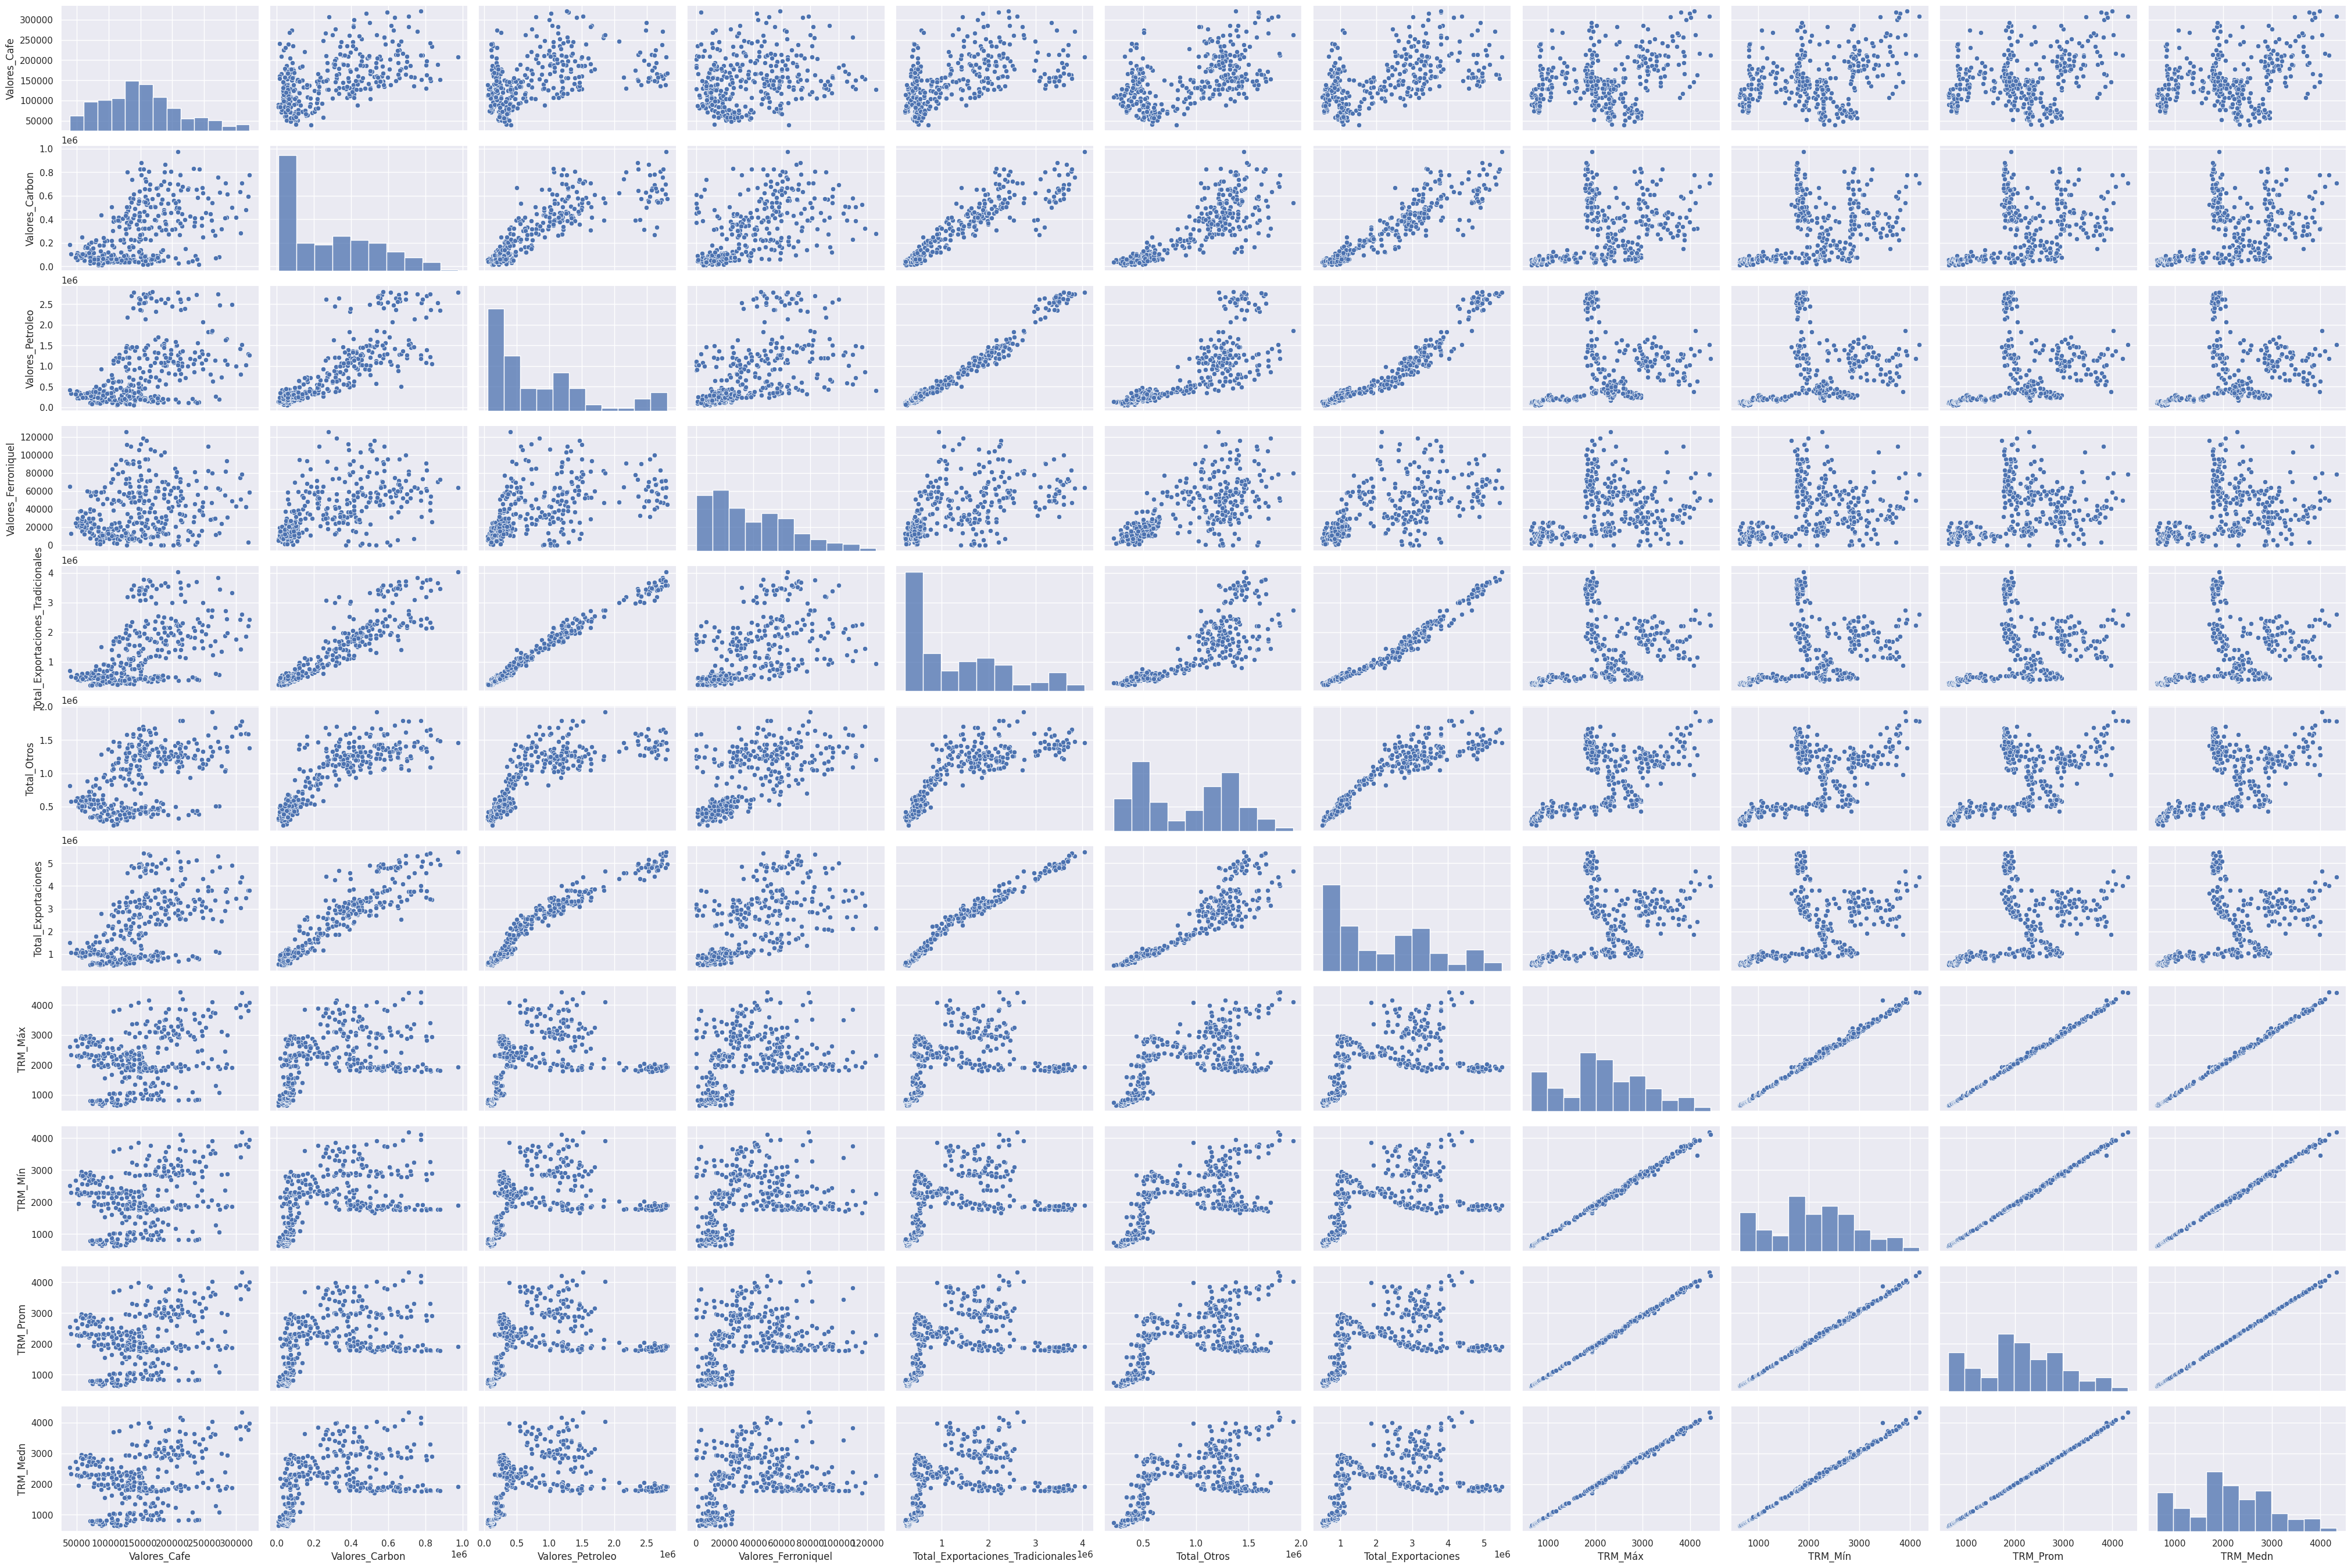

In [792]:
sns.pairplot(data_c,aspect=1.5)

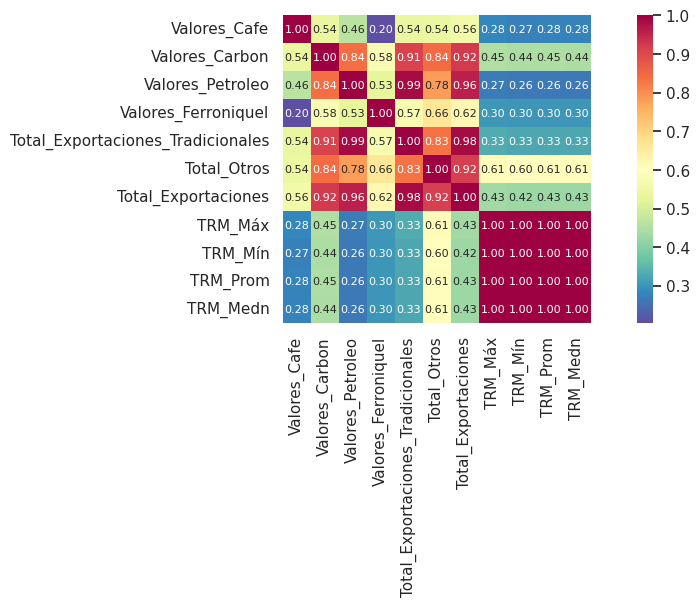

In [793]:
# Correlacion entre variables
corrmat = data_c.corr()
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 8},
                 yticklabels=data_c.columns,
                 xticklabels=data_c.columns,
                 cmap="Spectral_r")
plt.show()

# MODELO

### Se busca definir el valor de TRM con base en valores de exportación de café, carbón, petróleo, ferroniquel y otros. Se estimara con el valor promedio mensual de la TRM.

In [794]:
data_c

,Valores_Cafe,Valores_Carbon,Valores_Petroleo,Valores_Ferroniquel,Total_Exportaciones_Tradicionales,Total_Otros,Total_Exportaciones,TRM_Máx,TRM_Mín,TRM_Prom,TRM_Medn
0,108864.25900,39350.41700,1.309600e+05,2580.27400,281754.957,250016.024,5.317710e+05,659.74,632.37,644.058065,645.040
1,114798.50800,56115.59300,1.029642e+05,17022.56700,290900.838,282102.924,5.730038e+05,640.52,633.03,635.671724,634.930
2,89464.45900,11971.47500,1.390978e+05,6689.35800,247223.139,305083.814,5.523070e+05,647.24,635.86,640.501935,640.950
3,113534.57900,54218.06600,1.232370e+05,2159.91100,293149.605,238675.349,5.318250e+05,657.97,641.98,649.955000,650.275
4,118169.77300,36988.96000,1.266962e+05,20405.64600,302260.616,326456.530,6.287171e+05,664.50,653.10,659.771290,660.880
...,...,...,...,...,...,...,...,...,...,...,...
344,320963.33819,775831.32864,1.268496e+06,58741.49322,2424032.307,1377576.906,3.801609e+06,4084.11,3944.04,3999.616129,3987.320
345,262815.98178,539326.60469,1.858823e+06,79731.61108,2740697.086,1921823.458,4.662521e+06,4110.53,3912.34,4019.079355,4033.850
346,308379.74056,709379.02650,1.515488e+06,78582.18484,2611829.127,1776907.522,4.388737e+06,4413.86,4185.49,4322.469355,4337.280
347,211874.16780,777418.20690,1.187906e+06,49863.56226,2227062.045,1793942.610,4.021005e+06,4434.09,4114.39,4209.268000,4173.660


In [795]:
x, y = data_c.drop(['Total_Exportaciones_Tradicionales','Total_Exportaciones','TRM_Máx','TRM_Mín','TRM_Prom','TRM_Medn'],axis=1),data_c['TRM_Prom']

In [796]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

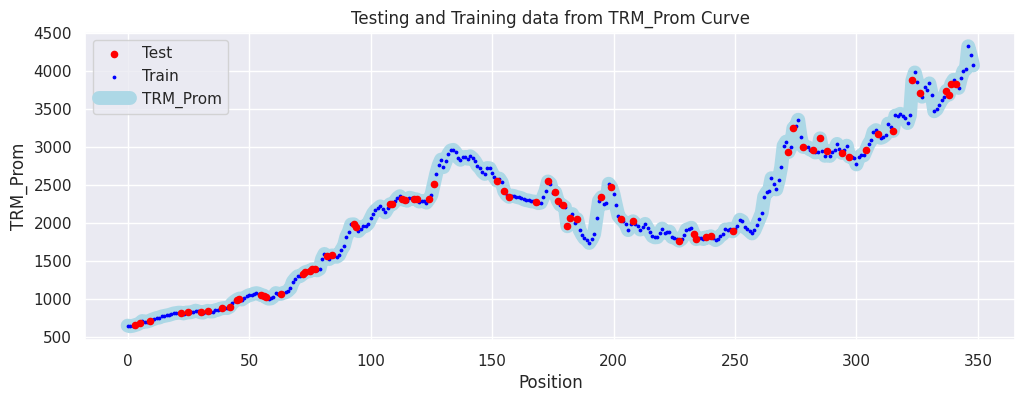

In [797]:
fig, ax = plt.subplots()

ax.scatter(y_test.index, y_test, label='Test', color='red', marker='o', s=20,zorder=3)
ax.scatter(y_train.index, y_train, label='Train', color='blue', marker='o', s=3, zorder=2)
ax.plot(data_c['TRM_Prom'], label='TRM_Prom', color='lightblue', linestyle='-', linewidth=10, zorder=1)



ax.set_xlabel('Position')
ax.set_ylabel('TRM_Prom')
ax.set_title('Testing and Training data from TRM_Prom Curve')
ax.legend()

# Show the plot
plt.show()


Los datos de entrenamiento estan distribuidos en toda la curva de TRM_Prom. De forma similar se encuentran los datos de prueba.

In [798]:
model = make_pipeline(
    TransformedTargetRegressor(
        regressor=Ridge(alpha=0.001)
    )
)

In [799]:
model.fit(X_train,y_train)

Pipeline(steps=[('transformedtargetregressor',
                 TransformedTargetRegressor(regressor=Ridge(alpha=0.001)))])

In [800]:
y_pred = model.predict(X_train)
mae = median_absolute_error(y_train,y_pred)
string_score1 = f"MAE on training set: {mae:.2f}"
string_score1A = f"RMSE on training set: {np.sqrt(mean_squared_error(y_train, y_pred))}\n"
MAE_TR1 = mae
RMSE_TR1 = np.sqrt(mean_squared_error(y_train, y_pred))

y_pred = model.predict(X_test)
mae = median_absolute_error(y_test,y_pred)
string_score2 = f"MAE on testing set: {mae:.2f}"
string_score2A = f"RMSE on testing set: {np.sqrt(mean_squared_error(y_test, y_pred))}\n"
MAE_TE1 = mae
RMSE_TE1 =np.sqrt(mean_squared_error(y_test, y_pred))


Text(0.5, 0, 'Real Data')

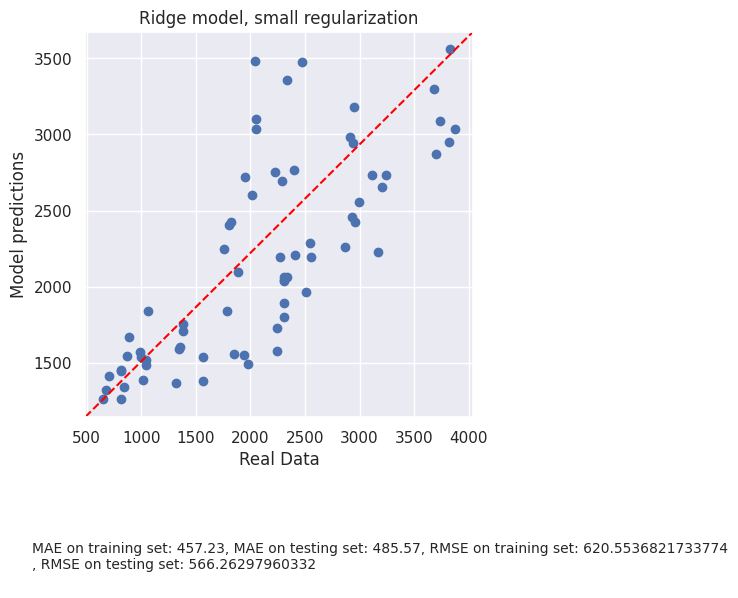

In [801]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(y_test,y_pred)
ax.plot([0,1],[0,1],transform=ax.transAxes,ls="--",c='red')
plt.text(0,40,string_score1+', '+string_score2+', '+string_score1A+', '+string_score2A,fontsize=10)
plt.title('Ridge model, small regularization')
plt.ylabel('Model predictions')
plt.xlabel('Real Data')

In [802]:
columns_name=(['Valores_Cafe','Valores_Carbon','Valores_Petroleo','Valores_Ferroniquel','Total_Otros'])

coef = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=['Coefficients'],
    index=columns_name,
)

coef

,Coefficients
Valores_Cafe,-0.001444
Valores_Carbon,0.000655
Valores_Petroleo,-0.000725
Valores_Ferroniquel,-0.004963
Total_Otros,0.002187


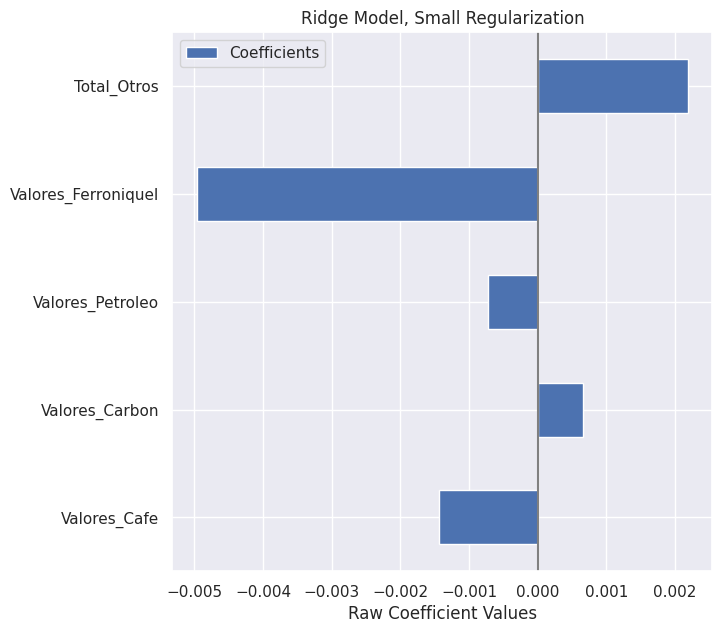

In [803]:
coef.plot.barh(figsize=(9,7))
plt.title('Ridge Model, Small Regularization')
plt.axvline(x=0,color='.5')
plt.xlabel('Raw Coefficient Values')
plt.subplots_adjust(left=0.3)

In [804]:
train_index = y_train.index
test_index = y_test.index

In [805]:
train_data = data_c.loc[train_index,['TRM_Máx','TRM_Mín','TRM_Medn']]
test_data = data_c.loc[test_index,['TRM_Máx','TRM_Mín','TRM_Medn']]

In [806]:
model.fit(X_train,train_data.loc[:,'TRM_Máx'])
y_pred = model.predict(X_train)
mae = median_absolute_error(train_data.loc[:,'TRM_Máx'],y_pred)
string_score1MAX = f"MAE on training set: {mae:.2f}"
string_score1AMAX = f"RMSE: {np.sqrt(mean_squared_error(train_data.loc[:,'TRM_Máx'], y_pred))}\n"
MAE_TR2 = mae
RMSE_TR2 = np.sqrt(mean_squared_error(train_data.loc[:,'TRM_Máx'], y_pred))

y_pred = model.predict(X_test)
mae = median_absolute_error(test_data.loc[:,'TRM_Máx'],y_pred)
string_score2MAX = f"MAE on testing set: {mae:.2f}"
string_score2AMAX = f"RMSE: {np.sqrt(mean_squared_error(test_data.loc[:,'TRM_Máx'], y_pred))}\n"
MAE_TE2 = mae
RMSE_TE2 =np.sqrt(mean_squared_error(test_data.loc[:,'TRM_Máx'], y_pred))

In [807]:
model.fit(X_train,train_data.loc[:,'TRM_Mín'])
y_pred = model.predict(X_train)
mae = median_absolute_error(train_data.loc[:,'TRM_Mín'],y_pred)
string_score1MIN = f"MAE on training set: {mae:.2f}"
string_score1AMIN = f"RMSE: {np.sqrt(mean_squared_error(train_data.loc[:,'TRM_Mín'], y_pred))}\n"
MAE_TR3 = mae
RMSE_TR3 = np.sqrt(mean_squared_error(train_data.loc[:,'TRM_Mín'], y_pred))

y_pred = model.predict(X_test)
mae = median_absolute_error(test_data.loc[:,'TRM_Mín'],y_pred)
string_score2MIN = f"MAE on testing set: {mae:.2f}"
MAE_TE3 = mae
RMSE_TE3 =np.sqrt(mean_squared_error(test_data.loc[:,'TRM_Mín'], y_pred))

In [808]:
model.fit(X_train,train_data.loc[:,'TRM_Medn'])
y_pred = model.predict(X_train)
mae = median_absolute_error(train_data.loc[:,'TRM_Medn'],y_pred)
string_score1Medn = f"MAE on training set: {mae:.2f}"
string_score1AMedn = f"RMSE: {np.sqrt(mean_squared_error(train_data.loc[:,'TRM_Medn'], y_pred))}\n"
MAE_TR4 = mae
RMSE_TR4 = np.sqrt(mean_squared_error(train_data.loc[:,'TRM_Medn'], y_pred))

y_pred = model.predict(X_test)
mae = median_absolute_error(test_data.loc[:,'TRM_Medn'],y_pred)
string_score2Medn = f"MAE on testing set: {mae:.2f}"
string_score2AMedn = f"RMSE: {np.sqrt(mean_squared_error(test_data.loc[:,'TRM_Medn'], y_pred))}\n"
MAE_TE4 = mae
RMSE_TE4 =np.sqrt(mean_squared_error(test_data.loc[:,'TRM_Medn'], y_pred))

In [809]:
error1 = {
    'Medición':['Promedio','Máximo','Mínimo','Mediana'],
    'Training Set - Median Abs. Error':[MAE_TR1, MAE_TR2, MAE_TR3, MAE_TR4],
    'Testing Set - Median Abs. Error':[MAE_TE1, MAE_TE2, MAE_TE3, MAE_TE4],

   }

error1=pd.DataFrame(error1)
error1['Diferencia [%]']=100*(error1['Training Set - Median Abs. Error']-error1['Testing Set - Median Abs. Error'])/error1['Training Set - Median Abs. Error']
error1

,Medición,Training Set - Median Abs. Error,Testing Set - Median Abs. Error,Diferencia [%]
0,Promedio,457.231924,485.573030,-6.198409
1,Máximo,479.608908,504.333004,-5.155054
2,Mínimo,455.637143,464.228318,-1.885530
3,Mediana,458.168010,483.136772,-5.449696


In [810]:
error2 = {
    'Medición':['Promedio','Máximo','Mínimo','Mediana'],

    'Training Set - Root Mean Square':[RMSE_TR1, RMSE_TR2, RMSE_TR3, RMSE_TR4],
    'Testing Set - Root Mean Square':[RMSE_TE1, RMSE_TE2, RMSE_TE3, RMSE_TE4],
   }

error2=pd.DataFrame(error2)
error2['Diferencia [%]']=100*(error2['Training Set - Root Mean Square']-error2['Testing Set - Root Mean Square'])/error2['Training Set - Root Mean Square']
error2

,Medición,Training Set - Root Mean Square,Testing Set - Root Mean Square,Diferencia [%]
0,Promedio,620.553682,566.262980,8.748752
1,Máximo,633.459072,584.340982,7.753948
2,Mínimo,610.236702,549.255348,9.993066
3,Mediana,620.177463,569.833434,8.117681


In [811]:
error = pd.merge(error1,error2,on='Medición')
error

,Medición,Training Set - Median Abs. Error,Testing Set - Median Abs. Error,Diferencia [%]_x,Training Set - Root Mean Square,Testing Set - Root Mean Square,Diferencia [%]_y
0,Promedio,457.231924,485.573030,-6.198409,620.553682,566.262980,8.748752
1,Máximo,479.608908,504.333004,-5.155054,633.459072,584.340982,7.753948
2,Mínimo,455.637143,464.228318,-1.885530,610.236702,549.255348,9.993066
3,Mediana,458.168010,483.136772,-5.449696,620.177463,569.833434,8.117681
